In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/home/maciek/.pyenv/versions/3.8.12/envs/school-map-project/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
social = gpd.read_file('../raw_data/Maps/dataset.shp')

In [3]:
umwelt = gpd.read_file('../raw_data/Maps/umwelt_and_buildings.shp')

In [5]:
umwelt.PLR_ID = umwelt.PLR_ID.astype(int)

In [6]:
merged = social.merge(umwelt, on='PLR_ID', how='inner')

In [7]:
merged.shape

(542, 72)

In [9]:
merged = merged.rename({
    'BZR_ID_x': 'BZR_ID',
    'PGR_ID_x': 'PGR_ID',
    'x_bis_1900': 'bis_1900',
    'x1901-1910': '1901-1910',
    'x1911_1920': '1911-1920',
    'x1921_1930': '1921-1930',
    'x1931_1940': '1930-1940',
    'x1941_1950': '1941:1950',
    'x1951_1960': '1951:1960',
    'x1961_1970': '1961-1970',
    'x1971_1980': '1971-1980',
    'x1981_1990': '1980-1990',
    'x1991_2000': '1991-2000',
    'x2001_2010': '2001-2010',
    'x2011_2015': '2010-2015',
}, axis=1).drop(columns=['geometry_y', 'index_left'])

In [10]:
merged

,E_E,E_EM,E_EW,E_EU1,E_E1U6,E_E6U15,E_E15U18,E_E18U25,E_E25U55,E_E55U65,...,1980-1990,1991-2000,2001-2010,2010-2015,ew2015,index_left,laerm,luft,gruen,bio
0,7270.352618,0.492187,0.507813,0.007894,0.057267,0.137753,0.030203,0.058145,0.446264,0.123359,...,14.0,47.0,182.0,276.0,6620.0,288,1,1,0,1
1,9797.460933,0.495604,0.504396,0.010169,0.058263,0.089598,0.024142,0.057224,0.600788,0.089757,...,0.0,9.0,6.0,0.0,8879.0,11,3,2,1,2
2,2037.887335,0.470872,0.529128,0.007609,0.053591,0.083072,0.025393,0.067306,0.355233,0.131022,...,59.0,47.0,4.0,6.0,9921.0,229,1,1,2,2
3,6441.757140,0.522952,0.477048,0.012072,0.058829,0.064388,0.014803,0.060079,0.680503,0.064535,...,77.0,17.0,8.0,2.0,10525.0,62,1,1,0,2
4,14514.988193,0.480151,0.519849,0.009263,0.061672,0.110603,0.038139,0.079804,0.352087,0.112010,...,56.0,22.0,7.0,6.0,18146.0,399,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,6440.342217,0.487645,0.512355,0.004828,0.041508,0.076099,0.027935,0.074127,0.333953,0.171122,...,187.0,178.0,32.0,6.0,7436.0,396,1,1,2,2
538,2068.519553,0.512951,0.487049,0.005843,0.038032,0.093844,0.020962,0.041949,0.346883,0.188809,...,94.0,119.0,91.0,75.0,2486.0,69,1,1,2,0
539,9137.150256,0.499446,0.500554,0.005462,0.046298,0.088626,0.025099,0.045778,0.351910,0.204367,...,207.0,1020.0,634.0,152.0,8863.0,313,1,0,2,0
540,3836.154248,0.528045,0.471955,0.006987,0.040745,0.063427,0.018065,0.061069,0.583136,0.123645,...,7.0,0.0,0.0,0.0,4398.0,49,0,1,0,1


In [43]:
merged.PLR_ID

0      11501341
1       3701659
2       7601340
3       2500831
4      12601134
         ...   
537    12500927
538     3200204
539    10400941
540     8100101
541    11300616
Name: PLR_ID, Length: 542, dtype: int64

In [38]:
open_map = gpd.read_file('../raw_data/all_features_in_plr.csv').drop(columns=['field_1', 'geometry'])

In [40]:
for x in open_map.columns:
    open_map[x] = open_map[x].astype(float).astype(int)

In [41]:
open_map.dtypes

PLR_ID                                  int64
mobility_public_transport_amount        int64
mobility_bikepaths_amount               int64
mobility_bike_infraestructure_amount    int64
spaces_green_amount                     int64
spaces_water_amount                     int64
social_community_amount                 int64
social_culture_amount                   int64
social_eating_amount                    int64
social_night_life_amount                int64
activities_economic_amount              int64
activities_education_amount             int64
activities_health_care_amount           int64
activities_public_service_amount        int64
dtype: object

In [42]:
open_map.shape

(528, 14)

In [71]:
full = pd.merge(merged, open_map, on='PLR_ID', how='left')

In [73]:
full.shape

(542, 84)

In [91]:
full.columns

Index(['E_E', 'E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'Nummer', 'Name', 'EW', 'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1', 'BEZ', 'PLR_ID', 'MH_rate',
       'area', 'pop_dens', 'geometry_x', 'BZR_ID', 'PGR_ID', 'bis_1900',
       'x1901_1910', '1911-1920', '1921-1930', '1930-1940', '1941:1950',
       '1951:1960', '1961-1970', '1971-1980', '1980-1990', '1991-2000',
       '2001-2010', '2010-2015', 'ew2015', 'index_left', 'laerm', 'luft',
       'gruen', 'bio', 'mobility_public_transport_amount',
       'mobility_bikepaths_amount', 'mobility_bik

<AxesSubplot:>

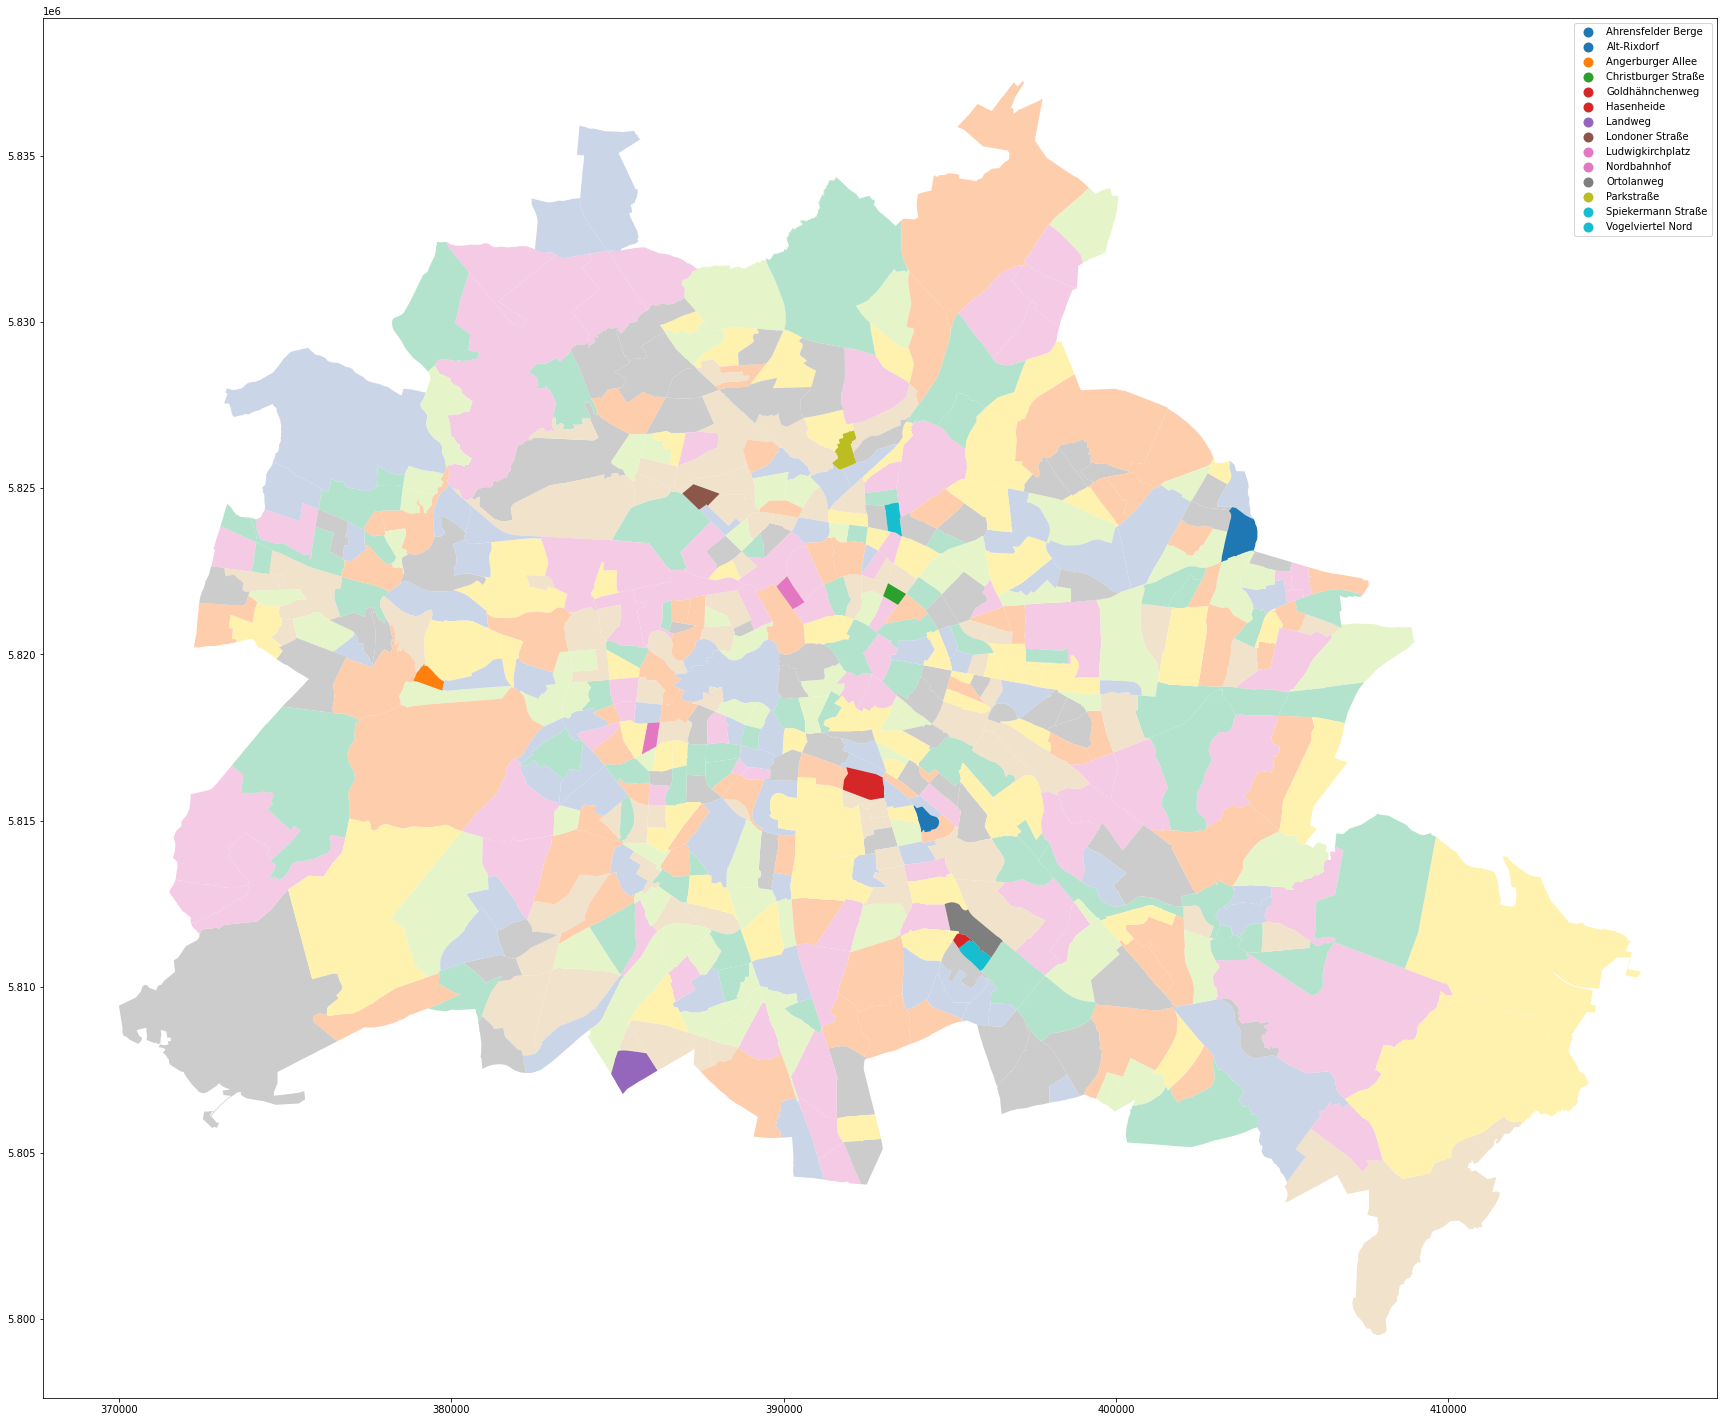

In [99]:
fig, ax = plt.subplots(figsize=(30, 30))
social.plot(ax=ax, cmap='Pastel2', linewidth=2, column='Name')
gpd.GeoDataFrame(full[full['social_culture_amount'].isna()],
                 geometry='geometry_x').plot(ax=ax, column='Name', legend=True)

<AxesSubplot:>

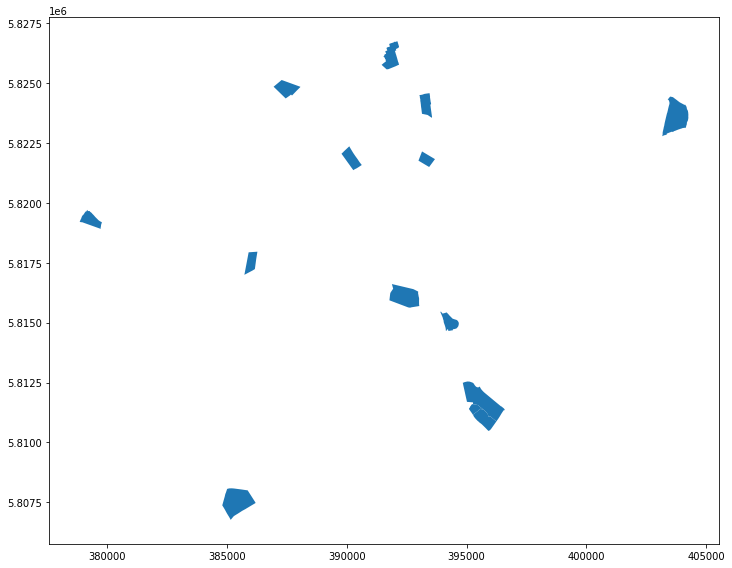

In [92]:
gpd.GeoDataFrame(full[full['social_culture_amount'].isna()], geometry='geometry_x').plot(figsize=(12,12))

In [83]:
full.columns[52:83]

Index(['bis_1900', 'x1901_1910', '1911-1920', '1921-1930', '1930-1940',
       '1941:1950', '1951:1960', '1961-1970', '1971-1980', '1980-1990',
       '1991-2000', '2001-2010', '2010-2015', 'ew2015', 'index_left', 'laerm',
       'luft', 'gruen', 'bio', 'mobility_public_transport_amount',
       'mobility_bikepaths_amount', 'mobility_bike_infraestructure_amount',
       'spaces_green_amount', 'spaces_water_amount', 'social_community_amount',
       'social_culture_amount', 'social_eating_amount',
       'social_night_life_amount', 'activities_economic_amount',
       'activities_education_amount', 'activities_health_care_amount'],
      dtype='object')

In [62]:
pd.options.display.max_rows = 542

In [127]:
full.isna().sum()

E_E                                      0
E_EM                                     0
E_EW                                     0
E_EU1                                    0
E_E1U6                                   0
E_E6U15                                  0
E_E15U18                                 0
E_E18U25                                 0
E_E25U55                                 0
E_E55U65                                 0
E_E65U80                                 0
E_E80U110                                0
MH_E                                     0
MH_EM                                    0
MH_EW                                    0
MH_U1                                    0
MH_1U6                                   0
MH_6U15                                  0
MH_15U18                                 0
MH_18U25                                 0
MH_25U55                                 0
MH_55U65                                 0
MH_65U80                                 0
MH_80U110  

<AxesSubplot:>

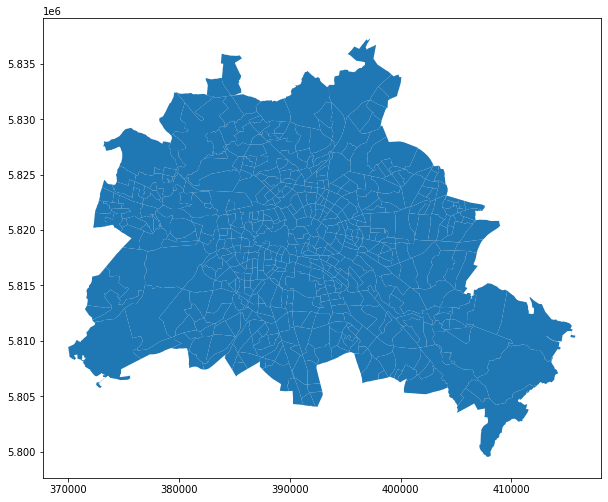

In [48]:
gpd.GeoDataFrame(pd.merge(merged, open_map, on='PLR_ID', how='left'), geometry='geometry_x').plot(figsize=(10,10))

In [140]:
full_gpd.iloc[58,:].EW / full_gpd.iloc[58,:].area

0.03630321303416645

In [143]:
full_gpd.iloc[32,:].EW/ full_gpd.iloc[32,:].area

0.0029419056164125498

In [103]:
full_gpd = gpd.GeoDataFrame(full, geometry='geometry_x')

In [147]:
full_gpd['pop_dens_2'] = [full_gpd.iloc[x].EW/ full_gpd.iloc[x].area for x in full_gpd.index]

<AxesSubplot:>

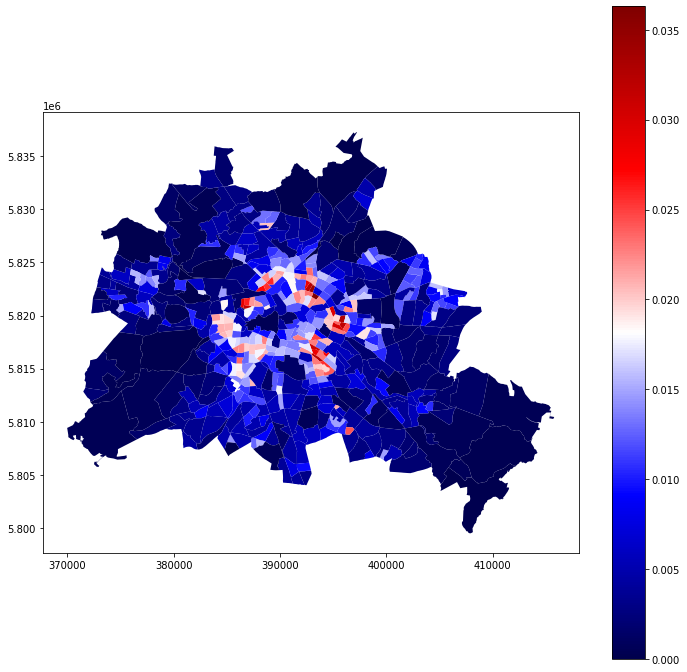

In [161]:
full_gpd.plot(figsize=(12,12), cmap='seismic', column='pop_dens_2', legend=True)

In [166]:
full_gpd.sort_values(by='PLR_ID').iloc[88,:]

E_E                                                                           2068.519553
E_EM                                                                             0.512951
E_EW                                                                             0.487049
E_EU1                                                                            0.005843
E_E1U6                                                                           0.038032
E_E6U15                                                                          0.093844
E_E15U18                                                                         0.020962
E_E18U25                                                                         0.041949
E_E25U55                                                                         0.346883
E_E55U65                                                                         0.188809
E_E65U80                                                                           0.1837
E_E80U110 

In [155]:
full_gpd.sort_values(by='EW',ascending=False)[0:9].EW

58      8448
192     7516
245    10109
37      8264
347     9548
3       7877
175     5235
406     7877
423    10190
Name: EW, dtype: int64

In [121]:
full_gpd[full_gpd.pop_dens == full_gpd.pop_dens.sort_values(ascending=False)[0]].Name

0    Karlshorst Süd
Name: Name, dtype: object

In [162]:
full_gpd.pop('pop_dens')

0      0.003171
1      0.023821
2      0.004925
3      0.025886
4      0.012876
5      0.004105
6      0.010631
7      0.006100
8      0.002991
9      0.001767
10     0.006979
11     0.022001
12     0.002642
13     0.011641
14     0.019124
15     0.000352
16     0.015955
17     0.003060
18     0.008286
19     0.005487
20     0.013285
21     0.026906
22     0.016890
23     0.019251
24     0.020662
25     0.007161
26     0.020328
27     0.002207
28     0.025404
29     0.011584
30     0.011602
31     0.001672
32     0.004426
33     0.004848
34     0.004457
35     0.009367
36     0.006224
37     0.032288
38     0.008025
39     0.014051
40     0.004376
41     0.004158
42     0.011006
43     0.004370
44     0.007363
45     0.014387
46     0.001641
47     0.020338
48     0.008471
49     0.020984
50     0.010556
51     0.002565
52     0.001776
53     0.002325
54     0.000926
55     0.004587
56     0.004021
57     0.002618
58     0.033508
59     0.011733
60     0.011637
61     0.023403
62     0

<AxesSubplot:>

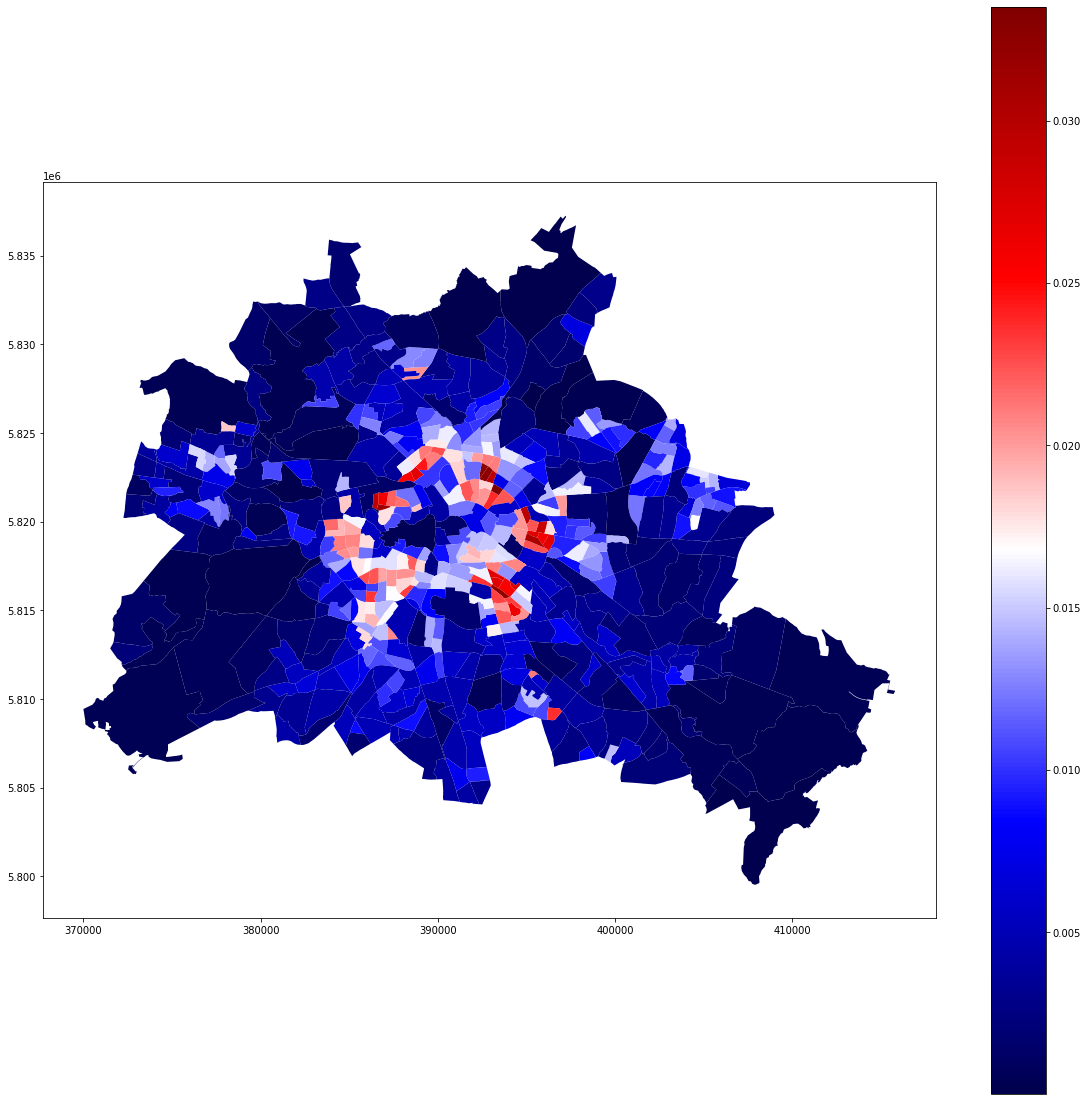

In [113]:
full_gpd.plot(figsize=(20,20), column='pop_dens', cmap='seismic', legend=True)

In [165]:
full_gpd.to_file('../raw_data/full.shp')

/tmp/ipykernel_970/4158258299.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  full_gpd.to_file('../raw_data/full.shp')


In [2]:
df = gpd.read_file('../raw_data/full.shp')

In [4]:
df.columns

Index(['E_E', 'E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110', 'MH_E',
       'MH_EM', 'MH_EW', 'MH_U1', 'MH_1U6', 'MH_6U15', 'MH_15U18', 'MH_18U25',
       'MH_25U55', 'MH_55U65', 'MH_65U80', 'MH_80U110', 'angebotsmi',
       'aenderung_', 'anteil_lei', 'anteil_soz', 'anteil_sta', 'entwicklun',
       'wohndauer', 'wohnungsum', 'wohnungs_1', 'wohnungsve', 'wohnungs_2',
       'Nummer', 'Name', 'EW', 'ant_arbeit', 'ant_transf', 'Kinderarmu',
       'ant_arbe_1', 'ant_tran_1', 'Kinderar_1', 'BEZ', 'PLR_ID', 'MH_rate',
       'area', 'BZR_ID', 'PGR_ID', 'bis_1900', 'x1901_1910', '1911-1920',
       '1921-1930', '1930-1940', '1941_1950', '1951_1960', '1961-1970',
       '1971-1980', '1980-1990', '1991-2000', '2001-2010', '2010-2015',
       'ew2015', 'index_left', 'laerm', 'luft', 'gruen', 'bio', 'mobility_p',
       'mobility_b', 'mobility_1', 'spaces_gre', 'spaces_wat', 'social_com',
       'social_cul', 'socia

In [5]:
e_list = ['E_EM', 'E_EW', 'E_EU1', 'E_E1U6', 'E_E6U15', 'E_E15U18',
       'E_E18U25', 'E_E25U55', 'E_E55U65', 'E_E65U80', 'E_E80U110']

In [9]:
temp = pd.DataFrame()
for x in e_list:
        temp[x] = df[x] * df['E_E']

In [11]:
temp['E_E'] = df['E_E']

In [12]:
temp

,E_EM,E_EW,E_EU1,E_E1U6,E_E6U15,E_E15U18,E_E18U25,E_E25U55,E_E55U65,E_E65U80,E_E80U110,E_E
0,3578.371128,3691.981490,57.395088,416.349168,1001.510202,219.584817,422.736458,3244.499071,896.864662,692.779315,318.633837,7270.352618
1,4855.657490,4941.803443,99.629581,570.832234,877.836828,236.534846,560.654742,5886.201184,879.389306,488.550307,197.831905,9797.460933
2,959.584197,1078.303138,15.506461,109.212332,169.290563,51.747113,137.161837,723.924260,267.007460,377.812778,186.224532,2037.887335
3,3368.727198,3073.029942,77.761704,378.962012,414.772512,95.356547,387.015029,4383.632441,415.718031,226.196198,62.342666,6441.757140
4,6969.389960,7545.598234,134.457162,895.167752,1605.408458,553.583581,1158.356559,5110.541680,1625.830806,2344.805761,1086.836435,14514.988193
...,...,...,...,...,...,...,...,...,...,...,...,...
537,3140.598723,3299.743494,31.097184,267.328168,490.106124,179.912236,477.402131,2150.772122,1102.081361,1198.743959,542.898932,6440.342217
538,1061.048526,1007.471027,12.085646,78.669353,194.118192,43.361097,86.773261,717.535246,390.555827,379.986967,165.433963,2068.519553
539,4563.516179,4573.634077,49.908569,423.031664,809.788915,229.329102,418.276209,3215.455991,1867.333326,1572.661355,551.365125,9137.150256
540,2025.661146,1810.493103,26.803522,156.302821,243.314007,69.300894,234.271554,2236.998100,474.320127,297.426892,97.416331,3836.154248
